# Preprocessing sample data for transforming into a format required by KMEANS Algorithm

In [1]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
import numpy as np
import tensorflow as tf

In [168]:
df_inp = pd.read_csv('Kmeans.csv')

In [169]:
df_inp.head()

,Lastnofitied,FirstNotifiedAt,SiteID,InstanceID,LTimeCluster,FTimeCluster,15minutelastcluster,15minutefirstcluster
0,1499855822,1499855822,3684492,24134,1499853600,1499853600,1499855400,1499855400
1,1500992767,1489833193,3606427,23473,1500991200,1489831200,1500992100,1489833000
2,1502538247,1487236451,3606357,23911,1502535600,1487235600,1502537400,1487235600
3,1505794196,1505794196,3658175,24092,1505793600,1505793600,1505793600,1505793600
4,1505940465,1500675765,3687379,23634,1505937600,1500674400,1505940300,1500675300


In [170]:
df_inp.count()

Lastnofitied            11145
FirstNotifiedAt         11145
SiteID                  11145
InstanceID              11145
LTimeCluster            11145
FTimeCluster            11145
15minutelastcluster     11145
15minutefirstcluster    11145
dtype: int64

In [5]:
instance_count = df_inp['InstanceID'].unique()

In [6]:
len(instance_count)

696

# Eleminating rows which have values in timecluster as zero

In [7]:
df_inp = df_inp.query("FTimeCluster >0 and LTimeCluster >0 ")

In [8]:
df_inp = df_inp[(df_inp['InstanceID'] > 0 )& (df_inp['15minutelastcluster'] > 0) &  (df_inp['15minutefirstcluster'] > 0)]

In [9]:
df_inp.count()

Lastnofitied            11145
FirstNotifiedAt         11145
SiteID                  11145
InstanceID              11145
LTimeCluster            11145
FTimeCluster            11145
15minutelastcluster     11145
15minutefirstcluster    11145
dtype: int64

# Converting all the column values for site into numeric values 

In [10]:
site_list = df_inp['SiteID'].unique()

In [11]:
len(site_list)

215

In [12]:
'''
site_dict = {}
for items in range(len(site_list)):
    site_dict[site_list[items]] = items
'''

'\nsite_dict = {}\nfor items in range(len(site_list)):\n    site_dict[site_list[items]] = items\n'

In [13]:
'''
def site_convert(x):
    if x in site_dict.keys():
        v = site_dict[x]
    return v
'''

'\ndef site_convert(x):\n    if x in site_dict.keys():\n        v = site_dict[x]\n    return v\n'

In [14]:
'''
df_inp['Site'] = df_inp['Site'].apply(lambda x : site_convert(x))
'''

"\ndf_inp['Site'] = df_inp['Site'].apply(lambda x : site_convert(x))\n"

In [15]:
'''
df_inp.count()
'''

'\ndf_inp.count()\n'

In [16]:
df_inp.head()


,Lastnofitied,FirstNotifiedAt,SiteID,InstanceID,LTimeCluster,FTimeCluster,15minutelastcluster,15minutefirstcluster
0,1499855822,1499855822,3684492,24134,1499853600,1499853600,1499855400,1499855400
1,1500992767,1489833193,3606427,23473,1500991200,1489831200,1500992100,1489833000
2,1502538247,1487236451,3606357,23911,1502535600,1487235600,1502537400,1487235600
3,1505794196,1505794196,3658175,24092,1505793600,1505793600,1505793600,1505793600
4,1505940465,1500675765,3687379,23634,1505937600,1500674400,1505940300,1500675300


In [17]:
#df_format = df_inp.drop(['Lastnofitied','FirstNotifiedAt','LTimeCluster','FTimeCluster','15minutelastcluster'],axis=1)
#df_format = df_inp.drop(['Lastnofitied','FirstNotifiedAt','LTimeCluster','FTimeCluster','15minutefirstcluster'],axis=1)
df_format = df_inp.drop(['Lastnofitied','FirstNotifiedAt','LTimeCluster','15minutelastcluster','15minutefirstcluster'],axis=1)
#df_format = df_inp.drop(['Lastnofitied','FirstNotifiedAt','FTimeCluster','15minutelastcluster','15minutefirstcluster'],axis=1)

In [18]:
#col_list = ['15minutefirstcluster','SiteID','InstanceID']
#col_list = ['15minutelastcluster','SiteID','InstanceID']
col_list = ['FTimeCluster','SiteID','InstanceID']
#col_list = ['LTimeCluster','SiteID','InstanceID']

In [19]:
df_format = df_format[col_list]

In [20]:
df_format.head()

,FTimeCluster,SiteID,InstanceID
0,1499853600,3684492,24134
1,1489831200,3606427,23473
2,1487235600,3606357,23911
3,1505793600,3658175,24092
4,1500674400,3687379,23634


In [21]:
df_format.count()


FTimeCluster    11145
SiteID          11145
InstanceID      11145
dtype: int64

In [22]:
df_data = df_format

# Scaling  the input data

In [23]:
df_data[col_list] = df_data[col_list].apply(lambda x : (x- x.min())/(x.max() - x.min()))

In [24]:
df_data.head()

,FTimeCluster,SiteID,InstanceID
0,0.472209,0.943576,0.885117
1,0.213016,0.923475,0.022193
2,0.145890,0.923457,0.593995
3,0.625826,0.936800,0.830287
4,0.493436,0.944320,0.232376


In [25]:
df_data.count()

FTimeCluster    11145
SiteID          11145
InstanceID      11145
dtype: int64

In [26]:
data1 = df_data.values

In [27]:
data1

array([[  4.72209291e-01,   9.43576339e-01,   8.85117493e-01],
       [  2.13015548e-01,   9.23475243e-01,   2.21932115e-02],
       [  1.45889582e-01,   9.23457219e-01,   5.93994778e-01],
       ..., 
       [  9.99720696e-01,   2.57491788e-07,   9.93472585e-01],
       [  1.00000000e+00,   0.00000000e+00,   9.92167102e-01],
       [  1.00000000e+00,   0.00000000e+00,   9.92167102e-01]])

In [28]:
data2 = np.nan_to_num(data1)


In [29]:
data2

array([[  4.72209291e-01,   9.43576339e-01,   8.85117493e-01],
       [  2.13015548e-01,   9.23475243e-01,   2.21932115e-02],
       [  1.45889582e-01,   9.23457219e-01,   5.93994778e-01],
       ..., 
       [  9.99720696e-01,   2.57491788e-07,   9.93472585e-01],
       [  1.00000000e+00,   0.00000000e+00,   9.92167102e-01],
       [  1.00000000e+00,   0.00000000e+00,   9.92167102e-01]])

In [30]:
unique_hours = []

[unique_hours.append(item[0]) for item in data2 if item[0] not in unique_hours]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [31]:
len(unique_hours)

1638

In [32]:
unique_hours

[0.47220929149986035,
 0.21301554790056793,
 0.14588958197560747,
 0.6258262731589237,
 0.49343636532911272,
 0.63262266083232477,
 0.0025137324271483101,
 0.64472581696303888,
 0.17847500232753002,
 0.65720137789777489,
 0.0,
 0.37799087608230147,
 0.22064984638301835,
 0.65906340191788471,
 0.19625733171957918,
 0.33963318126803838,
 0.56251745647518858,
 0.62945721999813797,
 0.4645749930174099,
 0.49548459175123361,
 0.35992924308723584,
 0.17512335909133228,
 0.1033423331160972,
 0.17884740713155201,
 0.26533842286565495,
 0.3855320733637464,
 0.41364863606740526,
 0.17670607950842565,
 0.5464109487012383,
 0.16274089935760172,
 0.64193278093287398,
 0.6583185923098408,
 0.64090866772181365,
 0.37510473885113116,
 0.64761195419420914,
 0.4569406945349595,
 0.66790801601340655,
 0.62731589237501162,
 0.68811097663159859,
 0.68820407783260407,
 0.62843310678707753,
 0.50954287310306301,
 0.68829717903360954,
 0.68801787543059301,
 0.63085373801322042,
 0.68839028023461502,
 0.220836

In [34]:
dict_time = {}
for items in range(len(unique_hours)):
    dict_time[unique_hours[items]] = items
    if unique_hours[items]== '':
        print(unique_hours[items])

In [35]:
dict_time

{0.6888557862396425: 54,
 0.0: 10,
 0.71799646215436175: 186,
 0.75542314495856999: 354,
 0.92542593799460016: 1250,
 0.87598920026068339: 948,
 0.74844055488315797: 323,
 0.89004748161251279: 1036,
 0.95587003072339638: 1421,
 0.81929056884833817: 675,
 1.0: 1637,
 0.97951773577879153: 1562,
 0.69527976910902156: 86,
 0.75840238339074573: 367,
 0.89442323805977098: 1066,
 0.76259193743599296: 386,
 0.88315799273810636: 994,
 0.78884647611954195: 518,
 0.73745461316450978: 265,
 0.79387394097383857: 544,
 0.82645936132576114: 705,
 0.94851503584396235: 1378,
 0.79880830462712971: 575,
 0.77832604040592124: 462,
 0.76976072991341593: 421,
 0.89032678521552933: 1038,
 0.94451168420072618: 1356,
 0.81193557396890415: 631,
 0.98892095708034633: 1617,
 0.70319337119448844: 119,
 0.74117866120472953: 286,
 0.96806628805511596: 1489,
 0.88334419514011731: 996,
 0.80849082953170093: 617,
 0.41364863606740526: 26,
 0.86286193091890884: 878,
 0.934270552090122: 1296,
 0.79098780374266831: 529,
 

In [36]:
month = []
for i in data2:
    month.append(i[0])

month
mnth = np.array(month)
mnth = mnth.astype('int32')
len(mnth)

11145

In [37]:
y = data2
len(y)

11145

# Define parameters for building the KMEANS CLUSTER

In [36]:
#specify the value of number of clusters 
k = 100
#k = len(unique_hours)
# Build KMeans Clustering model.
num_clusters = k
estimator = tf.contrib.learn.KMeansClustering(
    num_clusters,
    model_dir="C:/Orica_f_h_2318",
    initial_clusters='kmeans_plus_plus',
    distance_metric='squared_euclidean',
    relative_tolerance = 0.001,
    kmeans_plus_plus_num_retries = 10,
    use_mini_batch=True)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000DB345C0>, '_model_dir': 'C:/Orica_f_h_2318', '_keep_checkpoint_max': 5, '_task_type': None, '_tf_random_seed': None, '_task_id': 0, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_evaluation_master': '', '_session_config': None, '_master': '', '_is_chief': True, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_environment': 'local'}


# Split the input data into training set and test set

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(data2,test_size=0.30,random_state=101)

# Finding optimal number of clusters

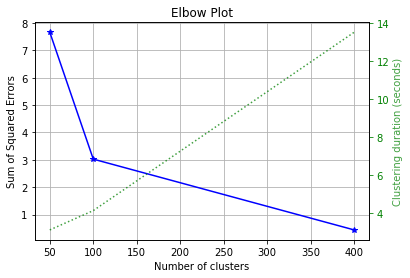

In [150]:
import scikitplot
from sklearn.cluster import KMeans
%matplotlib inline
elbow_check = KMeans()
scikitplot.cluster.plot_elbow_curve(elbow_check,X=data1,cluster_ranges = (100,400,50) )

In [152]:

cluster_range= range(100,400,50)
#cluster_range= [100,300,500,700,900,1100,1300,1500,1700,2100]
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit(data1)
  cluster_errors.append( clusters.inertia_ )

In [153]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [154]:
clusters_df.head(10)

,cluster_errors,num_clusters
0,3.058590,100
1,1.768219,150
2,1.184156,200
3,0.877618,250
4,0.665244,300
5,0.535660,350


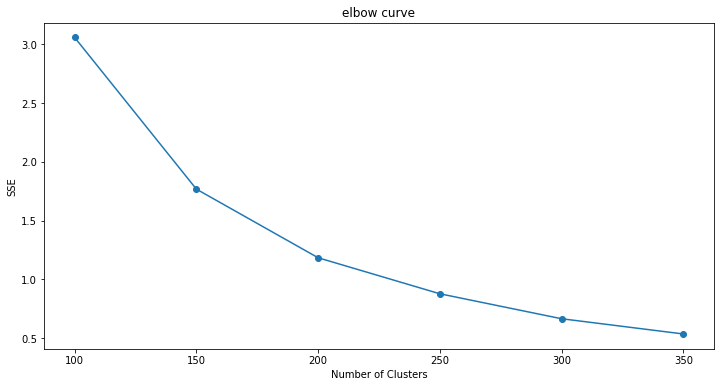

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('elbow curve')

In [40]:
X_train.shape

(7801, 3)

In [41]:
X_test.shape

(3344, 3)

# Define a function to convert the elements in the array to float32

In [37]:
def train_input_fn():
    #data = tf.constant(X_train, tf.float32)
    data = tf.constant(data2, tf.float32)
    return (data, None)
train_input_fn()

(<tf.Tensor 'Const_1:0' shape=(11145, 3) dtype=float32>, None)

# Train the KMEANS model named estimator

In [38]:
# train
estimator.fit(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:/Orica_f_h_2318\model.ckpt.
INFO:tensorflow:loss = 4.13654, step = 1
INFO:tensorflow:Saving checkpoints for 9 into C:/Orica_f_h_2318\model.ckpt.
INFO:tensorflow:Loss for final step: 3.19341.


KMeansClustering(params={'random_seed': 0, 'distance_metric': 'squared_euclidean', 'kmeans_plus_plus_num_retries': 10, 'use_mini_batch': True, 'mini_batch_steps_per_iteration': 1, 'num_clusters': 100, 'relative_tolerance': 0.001, 'training_initial_clusters': 'kmeans_plus_plus'})

# 
Evaluate the model :-Define input Parameters for the model to predict


In [39]:
def predict_input_fn():
    ### WORKS FINE
    data = tf.constant(data2, tf.float32)

    return data

In [40]:
data2.shape

(11145, 3)

# AS THE MODEL HAS BEEN TRAIN, NOW USE DATA TO PRECICT THE OUTPUT

In [41]:
gen = estimator.predict(input_fn=predict_input_fn, as_iterable=True)

INFO:tensorflow:Restoring parameters from C:/Orica_f_h_2318\model.ckpt-9


In [42]:
clusters_predict = estimator.predict_cluster_idx(input_fn=predict_input_fn)
clusters = estimator.clusters()

In [161]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=350, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# Clusters generated by the KMEANS algoritm

In [43]:
 assignments = list(clusters_predict)

INFO:tensorflow:Restoring parameters from C:/Orica_f_h_2318\model.ckpt-9


In [44]:
len(clusters)

100

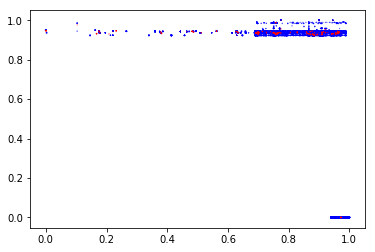

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1,)
ax1.scatter(data2[:,0],data2[:,1],data2[:,2],c='b',marker='o',vmin=0,)
ax1.scatter(clusters[:,0],clusters[:,1],clusters[:,2],c='r',marker='x')
plt.show()

In [46]:
if 0 in assignments:
    print(assignments.index(0))

3150


In [47]:
assignments[0]

61

# Retrieve the precictions into a list named preds

In [48]:
preds = list(gen)
preds

[{'all_scores': array([ 0.69002151,  0.29071188,  1.15219903,  0.74411941,  0.25307512,
          0.68107581,  0.90389204,  0.08253646,  0.35134399,  0.09458041,
          0.81722188,  0.73795307,  0.7280817 ,  0.46991885,  0.85601914,
          0.15940714,  0.56782019,  0.20324492,  1.02217448,  0.69288838,
          0.60308444,  0.92312753,  0.94661021,  0.54921782,  0.84279883,
          0.44242072,  0.27294767,  0.43681324,  0.54313135,  0.16454327,
          0.77038658,  0.2164166 ,  0.78296673,  0.24384522,  0.51824486,
          0.66977179,  0.18127358,  0.82603574,  0.78758121,  0.14672267,
          0.70643973,  0.47058892,  0.42879319,  0.26237607,  0.59886253,
          0.06260026,  0.87420583,  0.43457878,  0.38360333,  0.35304093,
          0.77317631,  0.22387397,  0.30458891,  0.62771165,  0.40281725,
          0.95425272,  0.94962049,  0.7669698 ,  0.82437682,  0.73392999,
          0.08703828,  0.00487733,  0.86610991,  0.40451872,  0.7681942 ,
          0.68156838,  0

In [49]:
count = 0
predicts  = []
for t in preds:
    count +=1
    print("Clusters Generated: %s" % t['cluster_idx'])
    #print("all_scores returned : %s" %t['all_scores'][0])
    predicts.append(t['cluster_idx'])

Clusters Generated: 61
Clusters Generated: 37
Clusters Generated: 29
Clusters Generated: 45
Clusters Generated: 47
Clusters Generated: 83
Clusters Generated: 51
Clusters Generated: 83
Clusters Generated: 29
Clusters Generated: 7
Clusters Generated: 81
Clusters Generated: 51
Clusters Generated: 27
Clusters Generated: 94
Clusters Generated: 45
Clusters Generated: 94
Clusters Generated: 15
Clusters Generated: 67
Clusters Generated: 74
Clusters Generated: 11
Clusters Generated: 47
Clusters Generated: 15
Clusters Generated: 42
Clusters Generated: 62
Clusters Generated: 5
Clusters Generated: 72
Clusters Generated: 27
Clusters Generated: 15
Clusters Generated: 5
Clusters Generated: 20
Clusters Generated: 72
Clusters Generated: 4
Clusters Generated: 28
Clusters Generated: 80
Clusters Generated: 27
Clusters Generated: 45
Clusters Generated: 47
Clusters Generated: 32
Clusters Generated: 3
Clusters Generated: 80
Clusters Generated: 12
Clusters Generated: 38
Clusters Generated: 20
Clusters Generat

Clusters Generated: 38
Clusters Generated: 64
Clusters Generated: 3
Clusters Generated: 32
Clusters Generated: 64
Clusters Generated: 64
Clusters Generated: 74
Clusters Generated: 87
Clusters Generated: 64
Clusters Generated: 3
Clusters Generated: 12
Clusters Generated: 74
Clusters Generated: 38
Clusters Generated: 32
Clusters Generated: 32
Clusters Generated: 64
Clusters Generated: 37
Clusters Generated: 12
Clusters Generated: 37
Clusters Generated: 53
Clusters Generated: 12
Clusters Generated: 32
Clusters Generated: 32
Clusters Generated: 32
Clusters Generated: 64
Clusters Generated: 12
Clusters Generated: 12
Clusters Generated: 32
Clusters Generated: 32
Clusters Generated: 74
Clusters Generated: 64
Clusters Generated: 38
Clusters Generated: 80
Clusters Generated: 36
Clusters Generated: 45
Clusters Generated: 45
Clusters Generated: 64
Clusters Generated: 87
Clusters Generated: 58
Clusters Generated: 11
Clusters Generated: 74
Clusters Generated: 9
Clusters Generated: 60
Clusters Gener

Clusters Generated: 17
Clusters Generated: 17
Clusters Generated: 12
Clusters Generated: 93
Clusters Generated: 70
Clusters Generated: 32
Clusters Generated: 70
Clusters Generated: 57
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 17
Clusters Generated: 89
Clusters Generated: 57
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 17
Clusters Generated: 64
Clusters Generated: 89
Clusters Generated: 89
Clusters Generated: 5
Clusters Generated: 64
Clusters Generated: 70
Clusters Generated: 32
Clusters Generated: 70
Clusters Generated: 32
Clusters Generated: 12
Clusters Generated: 74
Clusters Generated: 38
Clusters Generated: 64
Clusters Generated: 70
Clusters Generated: 19
Clusters Generated: 70
Clusters Generated: 7
Clusters Generated: 70
Clusters Generated: 7
Clusters Generated: 9
Clusters Generated: 89
Clusters Generated: 74
Clusters Generated: 83
Clusters Genera

Clusters Generated: 24
Clusters Generated: 60
Clusters Generated: 60
Clusters Generated: 32
Clusters Generated: 58
Clusters Generated: 58
Clusters Generated: 66
Clusters Generated: 60
Clusters Generated: 60
Clusters Generated: 60
Clusters Generated: 17
Clusters Generated: 60
Clusters Generated: 38
Clusters Generated: 60
Clusters Generated: 7
Clusters Generated: 60
Clusters Generated: 7
Clusters Generated: 59
Clusters Generated: 12
Clusters Generated: 58
Clusters Generated: 59
Clusters Generated: 67
Clusters Generated: 24
Clusters Generated: 66
Clusters Generated: 58
Clusters Generated: 66
Clusters Generated: 59
Clusters Generated: 24
Clusters Generated: 17
Clusters Generated: 54
Clusters Generated: 24
Clusters Generated: 17
Clusters Generated: 24
Clusters Generated: 34
Clusters Generated: 17
Clusters Generated: 58
Clusters Generated: 59
Clusters Generated: 58
Clusters Generated: 73
Clusters Generated: 38
Clusters Generated: 66
Clusters Generated: 57
Clusters Generated: 24
Clusters Gene

Clusters Generated: 96
Clusters Generated: 32
Clusters Generated: 68
Clusters Generated: 32
Clusters Generated: 96
Clusters Generated: 96
Clusters Generated: 96
Clusters Generated: 44
Clusters Generated: 44
Clusters Generated: 44
Clusters Generated: 74
Clusters Generated: 32
Clusters Generated: 44
Clusters Generated: 66
Clusters Generated: 44
Clusters Generated: 59
Clusters Generated: 6
Clusters Generated: 96
Clusters Generated: 20
Clusters Generated: 5
Clusters Generated: 20
Clusters Generated: 20
Clusters Generated: 32
Clusters Generated: 20
Clusters Generated: 59
Clusters Generated: 66
Clusters Generated: 11
Clusters Generated: 20
Clusters Generated: 11
Clusters Generated: 20
Clusters Generated: 38
Clusters Generated: 20
Clusters Generated: 20
Clusters Generated: 32
Clusters Generated: 0
Clusters Generated: 0
Clusters Generated: 20
Clusters Generated: 20
Clusters Generated: 20
Clusters Generated: 44
Clusters Generated: 20
Clusters Generated: 32
Clusters Generated: 20
Clusters Genera

Clusters Generated: 23
Clusters Generated: 63
Clusters Generated: 14
Clusters Generated: 50
Clusters Generated: 25
Clusters Generated: 75
Clusters Generated: 25
Clusters Generated: 25
Clusters Generated: 63
Clusters Generated: 95
Clusters Generated: 63
Clusters Generated: 8
Clusters Generated: 25
Clusters Generated: 25
Clusters Generated: 8
Clusters Generated: 8
Clusters Generated: 63
Clusters Generated: 8
Clusters Generated: 8
Clusters Generated: 52
Clusters Generated: 63
Clusters Generated: 25
Clusters Generated: 95
Clusters Generated: 6
Clusters Generated: 52
Clusters Generated: 52
Clusters Generated: 77
Clusters Generated: 23
Clusters Generated: 25
Clusters Generated: 50
Clusters Generated: 25
Clusters Generated: 63
Clusters Generated: 63
Clusters Generated: 63
Clusters Generated: 63
Clusters Generated: 63
Clusters Generated: 46
Clusters Generated: 8
Clusters Generated: 48
Clusters Generated: 8
Clusters Generated: 8
Clusters Generated: 8
Clusters Generated: 8
Clusters Generated: 46

Clusters Generated: 91
Clusters Generated: 14
Clusters Generated: 36
Clusters Generated: 46
Clusters Generated: 14
Clusters Generated: 63
Clusters Generated: 91
Clusters Generated: 25
Clusters Generated: 52
Clusters Generated: 63
Clusters Generated: 23
Clusters Generated: 13
Clusters Generated: 8
Clusters Generated: 52
Clusters Generated: 52
Clusters Generated: 63
Clusters Generated: 8
Clusters Generated: 33
Clusters Generated: 8
Clusters Generated: 26
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 13
Clusters Generated: 13
Clusters Generated: 91
Clusters Generated: 63
Clusters Generated: 91
Clusters Generated: 25
Clusters Generated: 33
Clusters Generated: 81
Clusters Generated: 4
Clusters Generated: 13
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 26
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 91
Clusters Generated: 33
Clusters Generated: 33
Clusters Genera

Clusters Generated: 56
Clusters Generated: 37
Clusters Generated: 30
Clusters Generated: 37
Clusters Generated: 30
Clusters Generated: 26
Clusters Generated: 79
Clusters Generated: 91
Clusters Generated: 63
Clusters Generated: 82
Clusters Generated: 26
Clusters Generated: 63
Clusters Generated: 85
Clusters Generated: 85
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 33
Clusters Generated: 63
Clusters Generated: 8
Clusters Generated: 13
Clusters Generated: 13
Clusters Generated: 85
Clusters Generated: 74
Clusters Generated: 33
Clusters Generated: 63
Clusters Generated: 79
Clusters Generated: 33
Clusters Generated: 13
Clusters Generated: 81
Clusters Generated: 85
Clusters Generated: 85
Clusters Generated: 79
Clusters Generated: 26
Clusters Generated: 30
Clusters Generated: 66
Clusters Generated: 31
Clusters Generated: 30
Clusters Generated: 30
Clusters Generated: 79
Clusters Generated: 71
Clusters Generated: 99
Clusters Generated: 71
Clusters Generated: 71
Clusters Gen

Clusters Generated: 56
Clusters Generated: 1
Clusters Generated: 36
Clusters Generated: 76
Clusters Generated: 21
Clusters Generated: 30
Clusters Generated: 1
Clusters Generated: 22
Clusters Generated: 1
Clusters Generated: 30
Clusters Generated: 21
Clusters Generated: 2
Clusters Generated: 2
Clusters Generated: 36
Clusters Generated: 99
Clusters Generated: 30
Clusters Generated: 1
Clusters Generated: 22
Clusters Generated: 40
Clusters Generated: 69
Clusters Generated: 79
Clusters Generated: 41
Clusters Generated: 41
Clusters Generated: 41
Clusters Generated: 13
Clusters Generated: 79
Clusters Generated: 13
Clusters Generated: 79
Clusters Generated: 69
Clusters Generated: 79
Clusters Generated: 79
Clusters Generated: 41
Clusters Generated: 79
Clusters Generated: 41
Clusters Generated: 79
Clusters Generated: 13
Clusters Generated: 1
Clusters Generated: 1
Clusters Generated: 1
Clusters Generated: 85
Clusters Generated: 1
Clusters Generated: 41
Clusters Generated: 86
Clusters Generated: 4

Clusters Generated: 40
Clusters Generated: 55
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 12
Clusters Generated: 10
Clusters Generated: 92
Clusters Generated: 17
Clusters Generated: 55
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 92
Clusters Generated: 10
Clusters Generated: 55
Clusters Generated: 92
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 55
Clusters Generated: 10
Clusters Generated: 56
Clusters Generated: 55
Clusters Generated: 55
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 3
Clusters Generated: 97
Clusters Generated: 11
Clusters Generated: 3
Clusters Generated: 9
Clusters Generated: 92
Clusters Generated: 10
Clusters Generated: 55
Clusters Generated: 99
Clusters Generated: 55
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 34
Clusters Generated: 10
Clusters Generated: 10
Clusters Generated: 86
Clusters Generated: 10
Clusters Gener

In [163]:
kmeans= KMeans(100)
kmeans.fit(data1)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("centroids : ")
print(centroids)
print("labels : ")
print(labels)

centroids : 
[[  6.94985569e-01   9.37958513e-01   6.13344938e-02]
 [  9.44521233e-01   9.31177912e-01   5.79031934e-01]
 [  9.72154277e-01   4.18749270e-07   9.94290160e-01]
 [  9.12961959e-01   9.37866119e-01   1.30623259e-01]
 [  7.58833514e-01   9.36101345e-01   3.20947982e-01]
 [  1.77978463e-01   9.36792659e-01   1.14106785e-01]
 [  5.11906211e-01   9.36813030e-01   1.09576890e-01]
 [  7.02129520e-01   9.36965699e-01   7.86895816e-01]
 [  8.29038463e-01   9.35909781e-01   1.30881618e-01]
 [  6.99759369e-01   9.40866545e-01   5.25105443e-01]
 [  8.97785309e-01   9.36763471e-01   3.14778068e-02]
 [  8.53331308e-01   9.36690788e-01   2.95222390e-01]
 [  7.76086875e-01   1.00000000e+00   1.30548303e-02]
 [  8.85232820e-01   9.30277937e-01   4.54603382e-01]
 [  6.29457220e-01   9.43084530e-01   1.43603133e-02]
 [  6.28433107e-04   9.46930299e-01   8.46279373e-01]
 [  4.64574993e-01   9.43072171e-01   2.61096606e-02]
 [  3.81178041e-01   9.33001795e-01   4.96605744e-01]
 [  9.13408305e

In [156]:
df_data.head()

,FTimeCluster,SiteID,InstanceID
0,0.472209,0.943576,0.885117
1,0.213016,0.923475,0.022193
2,0.145890,0.923457,0.593995
3,0.625826,0.936800,0.830287
4,0.493436,0.944320,0.232376


In [164]:
df_data['Clusters'] = predicts

In [165]:
df_data.head()

,FTimeCluster,SiteID,InstanceID,Clusters
0,0.472209,0.943576,0.885117,61
1,0.213016,0.923475,0.022193,37
2,0.145890,0.923457,0.593995,29
3,0.625826,0.936800,0.830287,45
4,0.493436,0.944320,0.232376,47


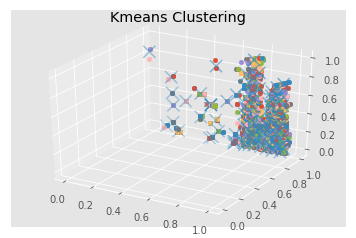

In [166]:
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

cluster_num = 100 
colors = ["g.","r.","c.","y."]

color = np.random.rand(cluster_num)

c = Counter(labels)


fig = figure()
ax = fig.gca(projection='3d')

fignum = 1

#fig = plt.figure(fignum, figsize=(20, 10))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for i in range(len(data2)):
    #print("coordinate:",data[i], "label:", labels[i])
    #print("i : ",i)
    #print("color[labels[i]] : ",color[labels[i]])
    #ax.scatter(data2[i][0], data2[i][1],data2[i][2],c=color[labels[i]])
    ax.scatter(data1[i][0], data1[i][1],data1[i][2],c=None)
    #ax.scatter(data[i][0], data[i][1],c=color[labels[i]])


#for cluster_number in range(cluster_num):
  #print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100)
#ax.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 100)
#ax.scatter(centroids[:, 0],centroids[:, 1],centroids[:, 2],,marker = "x")
plt.title('Kmeans Clustering')
plt.show()

# Import the paremeters considered for clustering along with the cluster ids generated into a csv file 


In [52]:
import time
date = time.strftime("%x")
time1 = time.strftime("%X")
#filename_cls = 'D:\\KmeansnewdataOricafirstmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
#filename_cls = 'D:\\KmeansnewdataOricalastmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
filename_cls = 'D:\\KmeansnewdataOricafirsthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
#filename_cls = 'D:\\KmeansnewdataOricalasthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
#df_temp = pd.read_csv('D:\Orica0903.csv')
z = df_inp.values
import csv
csv = open(filename_cls,"w") 
k = 0
#columnTitleRow = "First15minCluster,SiteID,InstanceID,Cluster_ID\n"
#columnTitleRow = "Last15minCluster,SiteID,InstanceID,Cluster_ID\n"
columnTitleRow = "LastHourlyCluster,SiteID,InstanceID,Cluster_ID\n"
csv.write(columnTitleRow)
for pred  in predicts:
        #print(k)
            
            #row = str(z[k][7]) + "," + str(z[k][2])+  "," + str(z[k][3])+  ","+ str(pred) + '\n'
            #row = str(z[k][6]) + "," + str(z[k][2])+  "," + str(z[k][3])+  ","+ str(pred) + '\n'
            #row = str(z[k][5]) + "," + str(z[k][2])+  "," + str(z[k][3])+  ","+ str(pred) + '\n'
            row = str(z[k][4]) + "," + str(z[k][2])+  "," + str(z[k][3])+  ","+ str(pred) + '\n'
            csv.write(row)
            k = k + 1
        
csv.close() 

In [53]:
df_clus = pd.DataFrame({'Cluster_ID':predicts})

In [54]:
df_inp.columns

Index(['Lastnofitied', 'FirstNotifiedAt', 'SiteID', 'InstanceID',
       'LTimeCluster', 'FTimeCluster', '15minutelastcluster',
       '15minutefirstcluster'],
      dtype='object')

In [55]:
#listcols = ['15minutefirstcluster','InstanceID']
#listcols = ['15minutelastcluster','InstanceID']
listcols = ['FTimeCluster','InstanceID']
#listcols = ['LTimeCluster','InstanceID']

In [56]:
df_xls = df_inp[listcols]

In [57]:
df_xls.head()

,FTimeCluster,InstanceID
0,1499853600,24134
1,1489831200,23473
2,1487235600,23911
3,1505793600,24092
4,1500674400,23634


In [58]:
df_xls = df_xls.join(df_clus)

In [59]:
df_xls['Cluster_ID'] = df_xls['Cluster_ID'].apply(lambda x: np.nan_to_num(x) )

In [60]:
df_xls['Cluster_ID'] = df_xls['Cluster_ID'].apply(lambda x: int(x) )

In [61]:
df_xls.head()

,FTimeCluster,InstanceID,Cluster_ID
0,1499853600,24134,61
1,1489831200,23473,37
2,1487235600,23911,29
3,1505793600,24092,45
4,1500674400,23634,47


In [62]:
df_xls.count()

FTimeCluster    11145
InstanceID      11145
Cluster_ID      11145
dtype: int64

In [63]:

#filename = 'D:\KmaeansjaccardOricafirstmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
#filename = 'D:\KmaeansjaccardOricalastmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
filename = 'D:\KmaeansjaccardOricafirsthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'
#filename = 'D:\KmaeansjaccardOricalasthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.csv'

In [64]:
filename


'D:\\KmaeansjaccardOricafirsthour-07-23-18-175736.csv'

In [65]:
jaccard_input_filename = filename

In [66]:
jaccard_input_filename

'D:\\KmaeansjaccardOricafirsthour-07-23-18-175736.csv'

In [67]:
df_xls.to_csv(filename,index=False)

# PROCESS THE DATA GENARATED AS A PART OF KMEAN CLUSTERING ALGORITHM

In [68]:
import pandas as pd
#sample = pd.read_csv('D:\Kmeansnewdata2.csv')
sample = pd.read_csv(filename)

# Display first 5 rows of the Dataframe Sample

In [69]:
sample.head()

,FTimeCluster,InstanceID,Cluster_ID
0,1499853600,24134,61
1,1489831200,23473,37
2,1487235600,23911,29
3,1505793600,24092,45
4,1500674400,23634,47


In [70]:
num_cluster = sample['Cluster_ID'].unique()

In [71]:
len(num_cluster)

100

In [72]:
num_cluster

array([61, 37, 29, 45, 47, 83, 51,  7, 81, 27, 94, 15, 67, 74, 11, 42, 62,
        5, 72, 20,  4, 28, 80, 32,  3, 12, 38, 68, 35, 90, 87, 64, 66, 36,
       48, 60, 53, 58,  9, 19, 34, 89, 88, 43, 84, 13, 39, 17, 54, 70, 93,
       73, 57, 14, 59, 24,  0, 44, 96, 52, 25,  6, 23, 50, 65, 77, 46, 95,
       75,  8, 63, 26, 76, 33, 99, 56, 91, 16, 71, 85, 82, 31, 22, 30, 79,
       21,  1, 41, 69, 92, 86, 49, 98, 40,  2, 10, 97, 55, 78, 18], dtype=int64)

# Organizing DeviceIDs based on the clusters generated by K means Algorithm

In [73]:
#dfnew = sample.groupby(['15minutefirstcluster','Cluster_ID']).size().reset_index(name='Freq')
#dfnew = sample.groupby(['15minutelastcluster','Cluster_ID']).size().reset_index(name='Freq')
dfnew = sample.groupby(['FTimeCluster','Cluster_ID']).size().reset_index(name='Freq')
#dfnew = sample.groupby(['LTimeCluster','Cluster_ID']).size().reset_index(name='Freq')

In [74]:
dfnew.head()

,FTimeCluster,Cluster_ID,Freq
0,1481594400,51,3
1,1481691600,51,1
2,1485590400,62,10
3,1487235600,29,2
4,1487887200,72,3


In [75]:
df_eval = dfnew[dfnew.Freq > 1]

In [76]:
df_eval.head()

,FTimeCluster,Cluster_ID,Freq
0,1481594400,51,3
2,1485590400,62,10
3,1487235600,29,2
4,1487887200,72,3
5,1488366000,42,8


# creating list variables dynamically 

In [77]:
df_e = df_eval.values
for items in df_e:
    vars()["list"+str(items[1])] = []

In [78]:
common_device= {}
test = sample.values
for items in df_e:
   list1 = []
   for i in test:
        if (i[0] == items[0]):  
             #print(i)
             list1.append(i[1])
             
   common_device[str(int(items[0]))+ "|" + str(int(items[1]))]= list1
        

In [79]:
common_device


{'1508814000|36': [23928,
  23664,
  23482,
  23844,
  23482,
  23482,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23664,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23844,
  23664,
  23844,
  23844,
  23844,
  23664,
  23844,
  23664,
  23664,
  23844],
 '1519027200|18': [23460, 23460, 23460, 23460],
 '1519254000|55': [23485, 23485, 23485, 23485, 23485, 23485],
 '1512154800|17': [23893, 23892],
 '1516795200|16': [23531, 23529, 23646, 23646, 23646],
 '1511751600|70': [23487, 23487],
 '1513072800|0': [23549, 23557],
 '1519444800|10': [23556, 23556],
 '1515096000|50': [23647,
  23750,
  23514,
  23730,
  23549,
  23735,
  23736,
  23747,
  23621,
  23754,
  23788,
  23722,
  23707,
  23802,
  23803,
  23780,
  23816,
  23821,
  23829,
  23766,
  23729,
  23622,
  23456,
  23861,
  23698,
  23653,
  23740,
  23510,
  23743,
  23745,
  23746,
  23752,
  23757,
  23759,
  23500,
  23787,

# Write the set of linked devices found into a text file

In [80]:
#device_filename = 'D:\\newalldevicelinksOricafirstmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#device_filename = 'D:\\newalldevicelinksOricalastmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
device_filename = 'D:\\newalldevicelinksOricafirsthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#device_filename = 'D:\\newalldevicelinksOricalasthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
DeviceFile = open(device_filename,'w') 
dev_list = []
for K,V in common_device.items():
   DeviceFile.write("[Time|KCluster] : " +str(K) +" Linked_Device : " + str(V) + '\n')
   dev_list.append(V)
DeviceFile.close()

In [81]:
dev_list[0]

[23928,
 23664,
 23482,
 23844,
 23482,
 23482,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23664,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23844,
 23664,
 23844,
 23844,
 23844,
 23664,
 23844,
 23664,
 23664,
 23844]

In [82]:
new_list = []
for items in dev_list:
    k = dev_list.count(items)
    if [items,k] not in new_list:
        new_list.append([items,k])

In [83]:
list_no_dup_dev = []
[list_no_dup_dev.append(item) for item in new_list if item not in list_no_dup_dev]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [84]:
len(list_no_dup_dev)

736

In [85]:
list_no_dup_dev

[[[23928,
   23664,
   23482,
   23844,
   23482,
   23482,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23664,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23844,
   23664,
   23844,
   23844,
   23844,
   23664,
   23844,
   23664,
   23664,
   23844],
  3],
 [[23460, 23460, 23460, 23460], 1],
 [[23485, 23485, 23485, 23485, 23485, 23485], 1],
 [[23893, 23892], 2],
 [[23531, 23529, 23646, 23646, 23646], 2],
 [[23487, 23487], 4],
 [[23549, 23557], 1],
 [[23556, 23556], 1],
 [[23647,
   23750,
   23514,
   23730,
   23549,
   23735,
   23736,
   23747,
   23621,
   23754,
   23788,
   23722,
   23707,
   23802,
   23803,
   23780,
   23816,
   23821,
   23829,
   23766,
   23729,
   23622,
   23456,
   23861,
   23698,
   23653,
   23740,
   23510,
   23743,
   23745,
   23746,
   23752,
   23757,
   23759,
   23500,
   23787,
   23797,
   23790,
   23811,
   238

# EXPORT THE RELATED PREDICTED LINKED DEVICES AND ITS FRQUENCY OF OCCURENCES IN THE INPUT DATA PROVIDED TO A TEXT FILE.
HERE ONLY FREQUENCIES GREATER THAN ONE IS CONSIDERED.

In [86]:
#device4_filename = 'D:\\newdevicefrequencyGE4_Oricafirstmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#device4_filename = 'D:\\newdevicefrequencyGE4_Oricalastmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
device4_filename = 'D:\\newdevicefrequencyGE4_Oricafirsthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#device4_filename = 'D:\\newdevicefrequencyGE4_Oricalasthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
DeviceFile = open(device4_filename,'w') 
for l in list_no_dup_dev:
   if l[1] >=4 :
    #eliminate lists containing the same list items
     if len(set(l[0])) == 1:
         continue
     else :
         j = set (l[0])
         DeviceFile.write("Linked  Device :   " +  "\n " + str(j) + "\n" + "Frequency :    " + str(l[1]) + '\n')
DeviceFile.close()

# JACCARD INDEX: jaccard.JPG










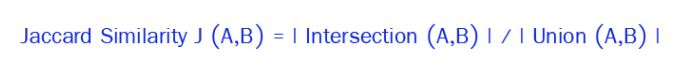

























The Jaccard index, also known as Intersection over Union and the Jaccard similarity coefficient , is a statistic used for comparing the similarity and diversity of sample sets. 

The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets


In [87]:
num_cluster

array([61, 37, 29, 45, 47, 83, 51,  7, 81, 27, 94, 15, 67, 74, 11, 42, 62,
        5, 72, 20,  4, 28, 80, 32,  3, 12, 38, 68, 35, 90, 87, 64, 66, 36,
       48, 60, 53, 58,  9, 19, 34, 89, 88, 43, 84, 13, 39, 17, 54, 70, 93,
       73, 57, 14, 59, 24,  0, 44, 96, 52, 25,  6, 23, 50, 65, 77, 46, 95,
       75,  8, 63, 26, 76, 33, 99, 56, 91, 16, 71, 85, 82, 31, 22, 30, 79,
       21,  1, 41, 69, 92, 86, 49, 98, 40,  2, 10, 97, 55, 78, 18], dtype=int64)

In [88]:
#INITIALIZATION OF SETS : Creating different sets based on the number of cluster values
for i in range(0,len(num_cluster)):
  vars()["set"+str(num_cluster[i])]= set()

# Adding the element ids into corresponding sets corresponding to each cluster

In [89]:
grp = sample.values
grp = grp.tolist()
grp

[[1499853600, 24134, 61],
 [1489831200, 23473, 37],
 [1487235600, 23911, 29],
 [1505793600, 24092, 45],
 [1500674400, 23634, 47],
 [1506056400, 23878, 83],
 [1481691600, 24048, 51],
 [1506524400, 23876, 83],
 [1488495600, 23939, 29],
 [1507006800, 24149, 7],
 [1507006800, 23997, 81],
 [1481594400, 24123, 51],
 [1496210400, 23639, 27],
 [1490126400, 23502, 94],
 [1507078800, 24061, 45],
 [1489183200, 23495, 94],
 [1494727200, 23875, 15],
 [1503345600, 23806, 67],
 [1505934000, 23467, 74],
 [1499558400, 23476, 11],
 [1500753600, 23636, 47],
 [1495512000, 23822, 15],
 [1488366000, 23687, 42],
 [1485590400, 23480, 62],
 [1488510000, 23543, 5],
 [1491854400, 23742, 72],
 [1496502000, 23637, 27],
 [1497589200, 23843, 15],
 [1488427200, 23544, 5],
 [1502722800, 23539, 20],
 [1487887200, 23789, 72],
 [1506416400, 23798, 4],
 [1507050000, 23602, 28],
 [1506376800, 23737, 80],
 [1496098800, 23612, 27],
 [1506636000, 24099, 45],
 [1499263200, 23605, 47],
 [1507420800, 23478, 32],
 [1505851200, 23

In [93]:
for i in range(len(grp)):
     #print(grp[i],i)
     #if grp[i][0] == 1:
      vars()["set"+str(grp[i][2])].add(grp[i][1])

In [94]:
len(set90)

8

In [95]:
set90

{23624, 23629, 23638, 23644, 23648, 23650, 23654, 23664}

Display the contents of each set

In [96]:
dict_cluster = {}
for i in range(0,len(num_cluster)):
        #print('The number of elements in  SET'+str(num_cluster[i])+' : ',len(vars()["set"+str(num_cluster[i])]))
        #print('The Contents of SET'+str(num_cluster[i])+' : ',vars()["set"+str(num_cluster[i])])
        #print('\n')
        dict_cluster[i] = vars()["set"+str(num_cluster[i])]

In [97]:
len(dict_cluster)

100

In [98]:
dict_cluster

{0: {24064, 24134},
 1: {23464, 23473},
 2: {23911, 23939},
 3: {24037, 24054, 24058, 24060, 24061, 24063, 24065, 24092, 24099},
 4: {23605, 23634, 23636},
 5: {23876, 23878},
 6: {24048, 24123},
 7: {24147,
  24148,
  24149,
  24152,
  24153,
  24155,
  24158,
  24162,
  24163,
  24165,
  24167,
  24170,
  24171,
  24172,
  24173,
  24175,
  24176,
  24181,
  24182,
  24184,
  24185,
  24186,
  24187,
  24188,
  24189,
  24190,
  24191,
  24192,
  24193,
  24194,
  24195,
  24196,
  24197,
  24198,
  24199,
  24200,
  24201,
  24202,
  24203,
  24204,
  24205,
  24206,
  24207,
  24208,
  24209,
  24210,
  24211,
  24212,
  24213,
  24214,
  24215},
 8: {23928,
  23944,
  23945,
  23948,
  23968,
  23970,
  23971,
  23972,
  23976,
  23977,
  23997},
 9: {23612, 23637, 23639},
 10: {23495, 23502},
 11: {23822, 23843, 23875},
 12: {23806},
 13: {23467, 23471},
 14: {23476},
 15: {23687},
 16: {23480},
 17: {23543, 23544},
 18: {23742, 23789},
 19: {23539, 23540},
 20: {23765,
  23767,


In [99]:
# adding only those device sets which have a cardinality GE 1
list_set1 =[]
for i in range(0,len(num_cluster)):
    if len(vars()["set"+str(num_cluster[i])]) > 1:
        list_set1.append(vars()["set"+str(num_cluster[i])])
    else:
        print(vars()["set"+str(num_cluster[i])])
     

{23806}
{23476}
{23687}
{23480}
{23484}
{23465}
{23519}
{23541}
{23463}
{23629}
{23466}
{23466}


# Group all the sets created into a list, the count of which will be used for iterating trough jaccard index calculation for each corresponding set

In [100]:
len(list_set1)

88

In [101]:
list_set1


[{24064, 24134},
 {23464, 23473},
 {23911, 23939},
 {24037, 24054, 24058, 24060, 24061, 24063, 24065, 24092, 24099},
 {23605, 23634, 23636},
 {23876, 23878},
 {24048, 24123},
 {24147,
  24148,
  24149,
  24152,
  24153,
  24155,
  24158,
  24162,
  24163,
  24165,
  24167,
  24170,
  24171,
  24172,
  24173,
  24175,
  24176,
  24181,
  24182,
  24184,
  24185,
  24186,
  24187,
  24188,
  24189,
  24190,
  24191,
  24192,
  24193,
  24194,
  24195,
  24196,
  24197,
  24198,
  24199,
  24200,
  24201,
  24202,
  24203,
  24204,
  24205,
  24206,
  24207,
  24208,
  24209,
  24210,
  24211,
  24212,
  24213,
  24214,
  24215},
 {23928, 23944, 23945, 23948, 23968, 23970, 23971, 23972, 23976, 23977, 23997},
 {23612, 23637, 23639},
 {23495, 23502},
 {23822, 23843, 23875},
 {23467, 23471},
 {23543, 23544},
 {23742, 23789},
 {23539, 23540},
 {23765,
  23767,
  23775,
  23782,
  23784,
  23786,
  23787,
  23792,
  23793,
  23797,
  23798,
  23802,
  23805,
  23813,
  23814},
 {23575,
  23577

In [102]:
list_set1[8]

{23928, 23944, 23945, 23948, 23968, 23970, 23971, 23972, 23976, 23977, 23997}

Jaccard Index Calculation Function

In [103]:
def jaccard_similarity(x,y):
     intersection_dev =  set.intersection(*[set(x), set(y)])
     intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
     intersection_dev =  set.intersection(*[set(x), set(y)])
     union_cardinality = len(set.union(*[set(x), set(y)]))
     #print('intersection : ',intersection_cardinality)
     #print('union_cardinality: ',union_cardinality)
     #print('Common devices : ', intersection_dev)
     if union_cardinality > 0:
        similar = intersection_cardinality/float(union_cardinality)
        
     else:
        similar = 0.0
        
     #if similar > 0.35:
        #print('JACCARD SIMILARITY value :',similar )
        #print('Common devices : ', intersection_dev)
                   
        
        
    
     return (similar,intersection_dev)

In [104]:
list_set1[1]  

{23464, 23473}

In [105]:
import time
from datetime import datetime
start = time.time()
start_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start))
print('start time : ',start_time)


list_linked1 = []
for q in range(0,len(list_set1)):
    #print(list_set[q])
    outk = [k for k, v in dict_cluster.items() if v == list_set1[q]]
    #outk = get_keys(list_set1[q])
    #print(outk)
    for i in range(0,len(list_set1)):
        ink = [k1 for k1, v1 in dict_cluster.items() if v1 == list_set1[i]]
        #ink = get_keys(list_set1[i])
       #print(i)
       #if outk != ink :
        if i > q :
           #if set(list_set1[q]) != set(list_set1[i]):
            
           r,common_dev = jaccard_similarity(list_set1[q], list_set1[i])
           
           if (r > 0.0) :
            #print('Common Devices: ',common_dev)
            #print('jaccard_distance  for set',q,' and set',i,' is : ',r,'Common Devices',common_dev)
            list_linked1.append(('SET'+str(outk),'SET'+str(ink),common_dev,r))
            
            

end = time.time()
end_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end))
print('end time : ',end_time)
print('time taken for jaccard to complete',len(unique_hours), 'clusters : ',(end - start) ,' seconds.')

start time :  2018-07-23 18:00:52
end time :  2018-07-23 18:00:53
time taken for jaccard to complete 1638 clusters :  0.24960017204284668  seconds.


In [106]:
len(list_linked1)

323

In [107]:
list_linked1

[('SET[3]', 'SET[38]', {24037, 24061}, 0.0625),
 ('SET[3]', 'SET[92]', {24054}, 0.029411764705882353),
 ('SET[5]', 'SET[91]', {23876}, 0.043478260869565216),
 ('SET[8]', 'SET[44]', {23971, 23972, 23976, 23977}, 0.16666666666666666),
 ('SET[8]', 'SET[46]', {23944, 23945}, 0.08333333333333333),
 ('SET[8]', 'SET[73]', {23928}, 0.027777777777777776),
 ('SET[8]',
  'SET[76]',
  {23944, 23968, 23971, 23972, 23977},
  0.16666666666666666),
 ('SET[8]', 'SET[78]', {23976}, 0.02631578947368421),
 ('SET[8]', 'SET[86]', {23928, 23944, 23945}, 0.08333333333333333),
 ('SET[8]', 'SET[98]', {23977}, 0.05263157894736842),
 ('SET[13]', 'SET[85]', {23467}, 0.09090909090909091),
 ('SET[13]', 'SET[89]', {23467}, 0.125),
 ('SET[19]', 'SET[68]', {23540}, 0.037037037037037035),
 ('SET[19]', 'SET[83]', {23540}, 0.037037037037037035),
 ('SET[19]', 'SET[95]', {23540}, 0.02702702702702703),
 ('SET[20]', 'SET[42]', {23767, 23775, 23782, 23784}, 0.10256410256410256),
 ('SET[20]',
  'SET[43]',
  {23786, 23787, 23793

In [108]:
a = []
for items in list_linked1:
    a.append(items[2])

In [109]:
list_linked_no_dup =[]
[list_linked_no_dup.append(item) for item in a if item not in list_linked_no_dup]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [110]:
len(list_linked_no_dup)

262

In [111]:
list_linked_no_dup

[{24037, 24061},
 {24054},
 {23876},
 {23971, 23972, 23976, 23977},
 {23944, 23945},
 {23928},
 {23944, 23968, 23971, 23972, 23977},
 {23976},
 {23928, 23944, 23945},
 {23977},
 {23467},
 {23540},
 {23767, 23775, 23782, 23784},
 {23786, 23787, 23793, 23797, 23802},
 {23784, 23786, 23787, 23793, 23797, 23802, 23813, 23814},
 {23767, 23775, 23782},
 {23802},
 {23784},
 {23575},
 {23624},
 {23577, 23580, 23589, 23590},
 {23589,
  23591,
  23592,
  23593,
  23595,
  23596,
  23598,
  23601,
  23602,
  23606,
  23607,
  23610,
  23613,
  23615,
  23618,
  23623,
  23624},
 {23577, 23580},
 {23589,
  23590,
  23591,
  23592,
  23593,
  23594,
  23595,
  23596,
  23597,
  23598,
  23601,
  23602,
  23606,
  23607,
  23608,
  23609,
  23610,
  23613,
  23615,
  23618,
  23619,
  23623,
  23624},
 {23577, 23580, 23589, 23590, 23592, 23593, 23594, 23595, 23597, 23598},
 {23601, 23602, 23606, 23610, 23613, 23615, 23618, 23619, 23623},
 {23589,
  23590,
  23591,
  23592,
  23593,
  23594,
  23595,

In [112]:
#jaccard_filename = 'D:\\jaccardscoreGE0Oricafirstmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#jaccard_filename = 'D:\\jaccardscoreGE0Oricalastmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
jaccard_filename = 'D:\\jaccardscoreGE0Oricafirsthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#jaccard_filename = 'D:\\jaccardscoreGE0Oricalasthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'

In [113]:
jfile1 = open(jaccard_filename,'w')
jfile1.write('List of devices predicted to be linked having jaccard score > 0.0 \n')
jfile1.write('===============================================================================\n')
for items in list_linked_no_dup:
    if len(items) > 1:
        jfile1.write(str(items)+ '\n' )
jfile1.write('===============================================================================\n')   
jfile1.close()

# Creating sets from the list of linked devices derived in the previous step and find out the similarity score between these sets.

# JACCARD INDEX ITERATIONS

In [114]:
loop = 0
no_of_loop_list = []
listname = list_linked_no_dup
#pred_device_filename = 'D:\\linkeddeviceOricafirstmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#pred_device_filename = 'D:\\linkeddeviceOricalastmin-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
pred_device_filename = 'D:\\linkeddeviceOricafirsthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#pred_device_filename = 'D:\\linkeddeviceOricalasthour-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
predfile = open(pred_device_filename,'w') 
while True:

     loop = loop + 1
     vars()["list_set"+str(loop)] =[]
     vars()["list_linked"+str(loop)]  = []
     for i in range(0,len(listname)):
            vars()["SET"+str(i)]= listname[i]
            #print('The number of elements in  SET'+str(i)+' : ',len(vars()["SET"+str(i)]))
            #print('The Contents of SET'+str(i)+' : ',vars()["SET"+str(i)])
            #print('\n')
     list_set_loop =[]
     for i in range(0,len(listname)):
             if len(vars()["SET"+str(i)]) > 1:
                    list_set_loop.append(vars()["SET"+str(i)])          
     
     #list_set = vars()["list_linked"+str(loop)]
     #print(list_set)

     common_devices = []
     for q in range(0,len(list_set_loop)):
        
        #outk = [k for k, v in dict_cluster.items() if v == list_set_2[q]]
         #print(list_set[q])
        for i in range(0,len(list_set_loop)):
             #ink = [k1 for k1, v1 in dict_cluster.items() if v1 == list_set_2[i]]
             #print(i)
             if i > q :
                 r,common_dev  = jaccard_similarity(list_set_loop[q], list_set_loop[i])
                 #print('r : ',r)
                 if (r >= 0.80):
                      print('jaccard_distance : ',r,'common device : ',common_dev)
                      #vars()["list_linked"+str(loop)].append(('SET'+str(q),'SET'+str(i),common_dev))
                      common_devices.append(common_dev)
                      #list_linked_2.append((q,i,list_set[q],list_set[i]))
                 
                    
  
     pred_linked_devices = []
     for item in common_devices:
            if item not in pred_linked_devices:
                 pred_linked_devices.append(item) 
                    
     if len(pred_linked_devices) >= 1:
        listname = pred_linked_devices   
        print(len(listname))
        print('Loop : ',loop)
        predfile.write('Loop : '+ str(loop))
        predfile.write('\n')
        print('============================================================')
        predfile.write('============================================================')
        predfile.write('\n')
        print('length of pred linked device',len(pred_linked_devices))
        predfile.write('length of pred linked device : '+ str(len(pred_linked_devices)))
        print('\n')
        predfile.write('\n')
        predfile.write('============================================================')
        predfile.write('\n')
        print('Linked Devices : ')
        predfile.write('Linked Devices having jaccard score > 0.50 : ')
        predfile.write('\n')
        print('============================================================')
        print('\n')
        predfile.write('\n')
        vars()["list_linked"+str(loop)] = pred_linked_devices
        no_of_loop_list.append(vars()["list_linked"+str(loop)])
        print(pred_linked_devices)
        predfile.write(str(pred_linked_devices))
        predfile.write('\n')
        predfile.write('============================================================')
        predfile.write('\n')
        print('============================================================')
        print('\n')
     else:
        break

predfile.close()

jaccard_distance :  0.8 common device :  {23488, 23482, 23477, 23478}
jaccard_distance :  0.8 common device :  {23488, 23482, 23477, 23486}
jaccard_distance :  0.9230769230769231 common device :  {23552, 23553, 23554, 23555, 23556, 23557, 23558, 23560, 23563, 23572, 23574, 23546}
jaccard_distance :  0.8571428571428571 common device :  {23552, 23553, 23554, 23555, 23556, 23557, 23558, 23560, 23563, 23572, 23574, 23546}
jaccard_distance :  0.8333333333333334 common device :  {23529, 23530, 23532, 23546, 23535}
jaccard_distance :  0.9285714285714286 common device :  {23552, 23553, 23554, 23555, 23556, 23557, 23558, 23560, 23563, 23572, 23574, 23546, 23547}
jaccard_distance :  0.8 common device :  {23552, 23553, 23554, 23555, 23556, 23557, 23558, 23560, 23562, 23563, 23572, 23546}
jaccard_distance :  0.8 common device :  {23648, 23650, 23644, 23654}
jaccard_distance :  0.8 common device :  {23688, 23705, 23694, 23695}
jaccard_distance :  0.8421052631578947 common device :  {23552, 23553, 2

In [115]:
no_of_loop_list[-1]

[{23546, 23552, 23553, 23554, 23555, 23556, 23557, 23558, 23560, 23563, 23572}]

# Determine Parent Child Relationship for the predicted linked device sets

In [116]:
temp_list_dev = []
if len(no_of_loop_list) > 0 :
    Linked_Devices = no_of_loop_list[-1]
else:
    for items in list_linked_no_dup:
        if len(items) > 1:
            temp_list_dev.append(items)
    Linked_Devices = temp_list_dev

In [117]:
Linked_Devices

[{23546, 23552, 23553, 23554, 23555, 23556, 23557, 23558, 23560, 23563, 23572}]

In [118]:
jaccard_input_filename 

'D:\\KmaeansjaccardOricafirsthour-07-23-18-175736.csv'

In [119]:
df = pd.read_csv(jaccard_input_filename)

In [120]:
df.head()

,FTimeCluster,InstanceID,Cluster_ID
0,1499853600,24134,61
1,1489831200,23473,37
2,1487235600,23911,29
3,1505793600,24092,45
4,1500674400,23634,47


In [124]:
clst = []
list4 = []
Parent = []
Child = []
Jsc = []
seta = []
setb = []
#filename1 = 'D:\\deviceclustermaping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#filename2 = 'D:\\ParentChildMapping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#filename1 = 'D:\\last15mindeviceclustermaping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#filename2 = 'D:\\last15minParentChildMapping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
filename1 = 'D:\\Firsthourdeviceclustermaping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
filename2 = 'D:\\FirsthourParentChildMapping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#filename1 = 'D:\\lasthourdeviceclustermaping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
#filename2 = 'D:\\lasthourParentChildMapping-' + str(date).replace('/','-')+'-'+str(time1).replace(':','')+'.txt'
device_cluster1 = open(filename1,'w')
parent_child = open(filename2,'w')
for items in Linked_Devices:
    list1 = list(items)
    device_list =[]
    cluster_list =[]
    for j in range(len(list1)):
        
        #print(list1[j])
        df1 = df[df['InstanceID'] == list1[j]]
        dev2 =df1['Cluster_ID'].values
        list2 = set(dev2)
        list3 = list(list2)
        device_list.append(list1[j])
        cluster_list.append(list2)
        device_cluster1.write(str(list1[j])+" : " + str(list2)+ "\n")
    device_cluster1.write("=====================================================================\n")    
        
    for q in range(len(cluster_list)):
        for i in range(len(cluster_list)):
            if i > q :
                 r,common_dev  = jaccard_similarity(cluster_list[q], cluster_list[i])
                 if r >= 0.50:
                    print("Cluster 1 : ",cluster_list[q])
                    print("Device id 1 : ",device_list[q])
                    print("Cluster 2 : ",cluster_list[i])
                    print("Device id 2 : ",device_list[i])
                    print("jaccard score :" , r)
                    print("Common Devices : ",common_dev)
                    parent_child.write("Device id 1 : " + str(device_list[q])+"\n")
                    parent_child.write("Cluster 1 : " + str(cluster_list[q])+"\n")
                    parent_child.write("\n")
                    parent_child.write("Device id 2 : " + str(device_list[i])+"\n")
                    parent_child.write("Cluster 2 : " + str(cluster_list[i])+"\n")
                    parent_child.write("\n")
                    parent_child.write("Jaccard score : " + str(r)+"\n")
                    parent_child.write("Common Device : " + str(common_dev) + "\n")
                    parent_child.write("\n")
                
                    if len(cluster_list[q]) > len(cluster_list[i]):
                        print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                        print("\n")
                        parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                        Parent.append(device_list[q])
                        Child.append(device_list[i])
                        Jsc.append(r)
                        
                        
                    else:
                        if len(cluster_list[q]) == len(cluster_list[i]) and r == 1.0:
                            print( str(device_list[q]) + " present in same clusters " + str(device_list[i]))
                            print("\n")
                            parent_child.write(str(device_list[q]) + " present in same clusters " + str(device_list[i])+"\n")
                           
                        else:
                            if len(cluster_list[q]) == len(cluster_list[i]) and r < 1.0:
                                 print( str(device_list[q]) + " is parent to " + str(device_list[i]))
                                 print("\n")
                                 parent_child.write(str(device_list[q]) + " is parent to " + str(device_list[i])+"\n")
                                 Parent.append(device_list[q])
                                 Child.append(device_list[i])
                                 Jsc.append(r)
                            else:
                                 print( str(device_list[q]) + " is child to " + str(device_list[i]))
                                 print("\n")
                                 parent_child.write(str(device_list[q]) + " is child to " + str(device_list[i])+"\n")
                                 Parent.append(device_list[i])
                                 Child.append(device_list[q])
                                 Jsc.append(r)
                    parent_child.write("========================================================================\n")
                    
        
                            
                        
                            
        
device_cluster1.close()   
parent_child.close()

Cluster 1 :  {0, 68, 10, 75, 53, 93, 30}
Device id 1 :  23552
Cluster 2 :  {0, 68, 10, 75, 53, 93, 30}
Device id 2 :  23553
jaccard score : 1.0
Common Devices :  {0, 68, 10, 75, 53, 93, 30}
23552 present in same clusters 23553


Cluster 1 :  {0, 68, 10, 75, 53, 93, 30}
Device id 1 :  23552
Cluster 2 :  {0, 68, 10, 75, 53, 93, 30}
Device id 2 :  23554
jaccard score : 1.0
Common Devices :  {0, 68, 10, 75, 53, 93, 30}
23552 present in same clusters 23554


Cluster 1 :  {0, 68, 10, 75, 53, 93, 30}
Device id 1 :  23552
Cluster 2 :  {0, 68, 10, 75, 53, 93, 30}
Device id 2 :  23555
jaccard score : 1.0
Common Devices :  {0, 68, 10, 75, 53, 93, 30}
23552 present in same clusters 23555


Cluster 1 :  {0, 68, 10, 75, 53, 93, 30}
Device id 1 :  23552
Cluster 2 :  {0, 68, 10, 75, 53, 93, 30}
Device id 2 :  23556
jaccard score : 1.0
Common Devices :  {0, 68, 10, 75, 53, 93, 30}
23552 present in same clusters 23556


Cluster 1 :  {0, 68, 10, 75, 53, 93, 30}
Device id 1 :  23552
Cluster 2 :  {0, 68, 1

In [125]:
df_jaccard = pd.DataFrame({"Parent":Parent,"Child":Child,"Similarity_Score":Jsc})

In [127]:
df_jaccard = df_jaccard[['Parent','Child','Similarity_Score']]

In [135]:
df_jaccard_same = df_jaccard.groupby('Parent')[['Child']].size().reset_index(name='Freq')

In [136]:
df_jaccard_same

,Parent,Freq
0,23546,10
1,23552,2
2,23553,2
3,23554,2
4,23555,2
5,23556,2
6,23557,2
7,23560,2
8,23563,2
9,23572,1


In [138]:
df_jaccard_1 = df_jaccard[df_jaccard['Parent']== df_jaccard_same['Parent'].values[0]]

In [139]:
df_jaccard_1

,Parent,Child,Similarity_Score
2,23546,23552,0.700000
5,23546,23553,0.700000
8,23546,23554,0.700000
11,23546,23555,0.700000
14,23546,23556,0.700000
17,23546,23557,0.700000
21,23546,23558,0.600000
23,23546,23560,0.700000
25,23546,23563,0.700000
26,23546,23572,0.545455


In [145]:
a = df_jaccard_1.pivot(index='Parent',columns='Child',values='Similarity_Score')

In [146]:
a

Child,23552,23553,23554,23555,23556,23557,23558,23560,23563,23572
Parent,,,,,,,,,,
23546,0.7,0.7,0.7,0.7,0.7,0.7,0.6,0.7,0.7,0.545455


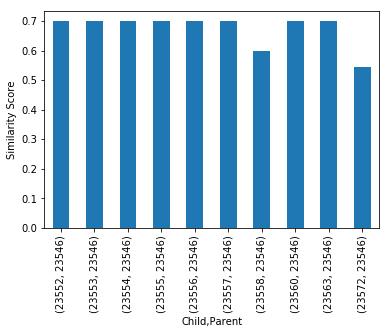

In [148]:
a.unstack('Parent').plot(kind='bar')
plt.ylabel('Similarity Score')

In [ ]:
df_jaccard_1['Weigthed_Ja']